In [1]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import pandas as pd
import numpy as np 
from tqdm import tqdm
import cv2

import os
import timm
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import f1_score, accuracy_score
import time
import import_ipynb
#from data_undersampling import undersampling1
#from data_oversampling import *
from data_augmentation import *
device = torch.device('cuda')

importing Jupyter notebook from data_augmentation.ipynb


Counter({'hazelnut-good': 391, 'screw-good': 320, 'carpet-good': 280, 'pill-good': 267, 'grid-good': 264, 'wood-good': 247, 'leather-good': 245, 'zipper-good': 240, 'tile-good': 230, 'cable-good': 224, 'metal_nut-good': 220, 'capsule-good': 219, 'transistor-good': 213, 'bottle-good': 209, 'toothbrush-good': 60, 'toothbrush-defective': 15, 'pill-crack': 13, 'pill-color': 13, 'screw-scratch_neck': 13, 'metal_nut-bent': 13, 'metal_nut-scratch': 12, 'screw-thread_side': 12, 'pill-scratch': 12, 'screw-manipulated_front': 12, 'screw-thread_top': 12, 'capsule-crack': 12, 'metal_nut-flip': 12, 'screw-scratch_head': 12, 'capsule-scratch': 12, 'bottle-contamination': 11, 'capsule-poke': 11, 'metal_nut-color': 11, 'bottle-broken_small': 11, 'pill-contamination': 11, 'wood-scratch': 11, 'capsule-faulty_imprint': 11, 'capsule-squeeze': 10, 'bottle-broken_large': 10, 'leather-cut': 10, 'carpet-thread': 10, 'pill-faulty_imprint': 10, 'leather-glue': 10, 'carpet-color': 10, 'zipper-broken_teeth': 10, 

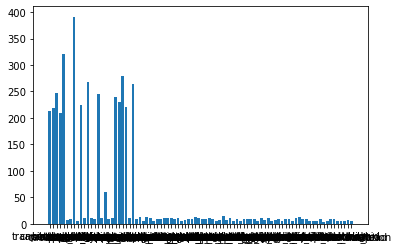

Counter({'cable-bent_wire': 164, 'zipper-fabric_border': 163, 'leather-poke': 161, 'zipper-rough': 160, 'leather-fold': 160, 'carpet-color': 155, 'pill-faulty_imprint': 154, 'wood-good': 153, 'grid-thread': 153, 'carpet-metal_contamination': 153, 'screw-good': 150, 'metal_nut-scratch': 150, 'metal_nut-bent': 150, 'tile-gray_stroke': 150, 'screw-manipulated_front': 150, 'zipper-split_teeth': 149, 'metal_nut-flip': 149, 'wood-liquid': 149, 'leather-good': 148, 'capsule-squeeze': 148, 'toothbrush-good': 148, 'zipper-broken_teeth': 148, 'screw-thread_top': 148, 'leather-color': 148, 'cable-cut_outer_insulation': 147, 'bottle-contamination': 147, 'cable-combined': 147, 'grid-broken': 146, 'hazelnut-hole': 146, 'transistor-bent_lead': 146, 'capsule-crack': 145, 'zipper-combined': 145, 'pill-scratch': 144, 'bottle-broken_large': 144, 'carpet-cut': 144, 'zipper-fabric_interior': 143, 'hazelnut-crack': 142, 'grid-glue': 142, 'tile-rough': 141, 'cable-poke_insulation': 141, 'transistor-good': 14

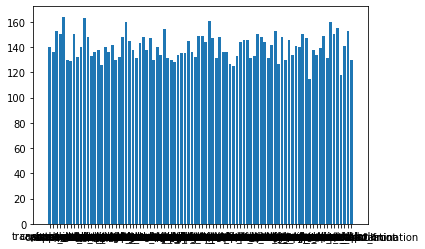

oversampling 해야 하는 개수:  [134, 129, 136, -69, 157, 132, 141, 127, 142, -91, 124, 129, 136, 133, 120, -83, 116, 119, 138, 145, 135, -144, 121, 144, 126, 130, 140, 136, -138, 127, 147, 133, 116, -262, 137, 127, 138, 128, 151, 121, -97, 152, 137, 120, 137, -82, 138, 119, 123, 120, 121, 144, -135, 125, 132, -170, 138, 118, 122, 128, 136, 125, 122, -92, 142, 118, 133, 115, 88, 141, 134, 123, -73, 135, 114, 109, -94, 125, 144, 124, 138, 137, 154, 135, -104, 151, 140, 125]
total num :  88


1 : bottle-broken_large label's deleting process: 100%|████████████████████████████████| 8/8 [00:00<00:00, 7790.67it/s]
1 : bottle-broken_large label's augmentation process: 100%|██████████████████████████| 142/142 [00:15<00:00,  9.09it/s]
2 : bottle-broken_small label's deleting process: 100%|████████████████████████████████| 5/5 [00:00<00:00, 5008.72it/s]
2 : bottle-broken_small label's augmentation process: 100%|██████████████████████████| 134/134 [00:16<00:00,  8.35it/s]
3 : bottle-contamination label's deleting process: 100%|███████████████████████████████| 8/8 [00:00<00:00, 3950.37it/s]
3 : bottle-contamination label's augmentation process: 100%|█████████████████████████| 144/144 [00:19<00:00,  7.45it/s]
6 : cable-cable_swap label's deleting process: 100%|███████████████████████████████████| 5/5 [00:00<00:00, 4949.62it/s]
6 : cable-cable_swap label's augmentation process: 100%|█████████████████████████████| 137/137 [00:42<00:00,  3.24it/s]
7 : cable-combined label's augmentation 

69 : toothbrush-good label's deleting process: 100%|█████████████████████████████████| 37/37 [00:00<00:00, 3531.52it/s]
69 : toothbrush-good label's augmentation process: 100%|█████████████████████████████| 125/125 [00:33<00:00,  3.74it/s]
70 : transistor-bent_lead label's deleting process: 100%|██████████████████████████████| 4/4 [00:00<00:00, 4006.02it/s]
70 : transistor-bent_lead label's augmentation process: 100%|████████████████████████| 145/145 [00:50<00:00,  2.85it/s]
71 : transistor-cut_lead label's deleting process: 100%|███████████████████████████████| 3/3 [00:00<00:00, 2966.27it/s]
71 : transistor-cut_lead label's augmentation process: 100%|█████████████████████████| 137/137 [00:39<00:00,  3.48it/s]
72 : transistor-damaged_case label's deleting process: 100%|███████████████████████████| 3/3 [00:00<00:00, 3008.83it/s]
72 : transistor-damaged_case label's augmentation process: 100%|█████████████████████| 126/126 [00:34<00:00,  3.67it/s]
73 : transistor-good label's deleting pr

In [2]:

# SMOTE oversampling  사용
overdata = data_augmentation("./data/train_df.csv")
y = overdata[1]

In [3]:
print(y)
print(y.shape)
## 없어도 됨
y_df =pd.DataFrame(y, columns=['label'])
y_df.to_csv('smotetomek_label.csv')
####

['transistor-good' 'capsule-good' 'wood-good' ... 'zipper-squeezed_teeth'
 'zipper-squeezed_teeth' 'zipper-squeezed_teeth']
(12340,)


In [4]:
y = pd.read_csv('smotetomek_result.csv')
print(y)
y['0'] = y['0'].astype(str)
y['0'] +='.png'
y['0'] = y['0'].str.replace('.0.png', '.png')

y = y.sort_values(by=['0'])
print("---------------------------------")
print(y)
train_labels = y['1']
print(train_labels)

                  0                      1
0      10000.000000        transistor-good
1      10001.000000           capsule-good
2      10003.000000              wood-good
3      10006.000000           capsule-good
4      10007.000000             screw-good
...             ...                    ...
12335  11562.854328  zipper-squeezed_teeth
12336  13592.718605  zipper-squeezed_teeth
12337  10898.441693  zipper-squeezed_teeth
12338  13306.808308  zipper-squeezed_teeth
12339  13232.091829  zipper-squeezed_teeth

[12340 rows x 2 columns]
---------------------------------
                            0                1
10404  10000.490216033772.png  transistor-good
0                   10000.png  transistor-good
1                   10001.png     capsule-good
2                   10003.png        wood-good
3                   10006.png     capsule-good
...                       ...              ...
10399  14272.562912938318.png  transistor-good
1476                14273.png  transistor-good
1

In [5]:

label_unique = sorted(np.unique(train_labels))
label_unique = {key:value for key,value in zip(label_unique, range(len(label_unique)))}

train_labels = [label_unique[k] for k in train_labels]


In [6]:
from glob import glob
train_png = sorted(glob('data/train/*.png'))
test_png = sorted(glob('data/test/*.png'))

In [7]:
# train, test 이미지 리사이즈
def img_load(path):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (512, 512))
    return img


In [8]:
train_imgs = [img_load(m) for m in tqdm(train_png)]
test_imgs = [img_load(n) for n in tqdm(test_png)]

100%|██████████████████████████████████████████████████████████████████████████████| 2154/2154 [01:18<00:00, 27.43it/s]


In [9]:
class Custom_dataset(Dataset):
    def __init__(self, img_paths, labels, mode='train'):
        self.img_paths = img_paths
        self.labels = labels
        self.mode=mode
    def __len__(self):
        return len(self.img_paths)
    def __getitem__(self, idx):
        img = self.img_paths[idx]
        if self.mode=='train':
            augmentation = random.randint(0,2)
            if augmentation==1:
                img = img[::-1].copy()
            elif augmentation==2:
                img = img[:,::-1].copy()
        img = transforms.ToTensor()(img)
        if self.mode=='test':
            pass
        
        label = self.labels[idx]
        return img, label
    
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.model = timm.create_model('efficientnet_b4', pretrained=True, num_classes=88) # label 개수: 88
        
    def forward(self, x):
        x = self.model(x)
        return x

In [10]:

batch_size = 12 # 원래 = 32
epochs = 30

# Train
train_dataset = Custom_dataset(np.array(train_imgs), np.array(train_labels), mode='train')
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

# Test
test_dataset = Custom_dataset(np.array(test_imgs), np.array(["tmp"]*len(test_imgs)), mode='test')
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [11]:

def score_function(real, pred):
    score = f1_score(real, pred, average="macro")
    return score

model = Network().to(device)

# 최적화
optimizer = torch.optim.NAdam(model.parameters(), lr=1e-3)
# 손실함수
criterion = nn.CrossEntropyLoss()
# 특성별로 데이터 스케일이 다를 경우, 모든 특성의 범위를 갖게 만들어줌 
scaler = torch.cuda.amp.GradScaler() 

for epoch in range(epochs):
    start=time.time()
    train_loss = 0
    train_pred=[]
    train_y=[]
    model.train()
    for batch in (train_loader):
        optimizer.zero_grad() # gradient를 0으로 초기화
        x = torch.tensor(batch[0], dtype=torch.float32, device=device)
        y = torch.tensor(batch[1], dtype=torch.long, device=device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        loss = criterion(pred, y)


        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        train_loss += loss.item()/len(train_loader)
        train_pred += pred.argmax(1).detach().cpu().numpy().tolist()
        train_y += y.detach().cpu().numpy().tolist()
        
    
    train_f1 = score_function(train_y, train_pred)

    TIME = time.time() - start
    print(f'epoch : {epoch+1}/{epochs}    time : {TIME:.0f}s/{TIME*(epochs-epoch-1):.0f}s')
    print(f'TRAIN    loss : {train_loss:.5f}    f1 : {train_f1:.5f}')
    if(train_loss < 0.03 and train_f1 > 0.994):
        break

epoch : 1/30    time : 252s/7295s
TRAIN    loss : 0.68679    f1 : 0.78673
epoch : 2/30    time : 241s/6762s
TRAIN    loss : 0.17712    f1 : 0.94824
epoch : 3/30    time : 242s/6521s
TRAIN    loss : 0.12865    f1 : 0.96415
epoch : 4/30    time : 241s/6262s
TRAIN    loss : 0.09940    f1 : 0.97364
epoch : 5/30    time : 242s/6056s
TRAIN    loss : 0.09608    f1 : 0.97451
epoch : 6/30    time : 245s/5871s
TRAIN    loss : 0.07847    f1 : 0.97811
epoch : 7/30    time : 241s/5540s
TRAIN    loss : 0.06991    f1 : 0.98117
epoch : 8/30    time : 243s/5340s
TRAIN    loss : 0.05673    f1 : 0.98644
epoch : 9/30    time : 242s/5076s
TRAIN    loss : 0.06387    f1 : 0.98451
epoch : 10/30    time : 242s/4838s
TRAIN    loss : 0.06672    f1 : 0.98380
epoch : 11/30    time : 241s/4587s
TRAIN    loss : 0.05644    f1 : 0.98623
epoch : 12/30    time : 243s/4368s
TRAIN    loss : 0.05096    f1 : 0.98609
epoch : 13/30    time : 243s/4125s
TRAIN    loss : 0.05269    f1 : 0.98635
epoch : 14/30    time : 243s/3883s

In [17]:
model.eval()
f_pred = []

with torch.no_grad():
    for batch in (test_loader):
        x = torch.tensor(batch[0], dtype = torch.float32, device = device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        f_pred.extend(pred.argmax(1).detach().cpu().numpy().tolist())

In [18]:
label_decoder = {val:key for key, val in label_unique.items()}

f_result = [label_decoder[result] for result in f_pred]

In [19]:
submission = pd.read_csv("data/sample_submission.csv")

submission["label"] = f_result

submission

,index,label
0,0,tile-glue_strip
1,1,grid-good
2,2,transistor-good
3,3,tile-gray_stroke
4,4,tile-good
...,...,...
2149,2149,tile-gray_stroke
2150,2150,screw-good
2151,2151,grid-good
2152,2152,leather-poke


In [20]:
submission.to_csv("efficientnet_b4_smotetomek-oversampling.csv", index = False)